In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
df= pd.read_csv('fer2013.csv')

In [3]:
Y = []
X = []
first = True
for line in open('fer2013.csv'):
    if first:
        first = False
    else:
        row = line.split(',')
        Y.append(int(row[0]))
        X.append([int(p) for p in row[1].split()])

X, Y = np.array(X) / 255.0, np.array(Y)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [5]:
x_train=x_train.reshape(28709,48,48)

In [6]:
import cv2
from PIL import Image as im

In [7]:
data = im.fromarray(x_train[0])

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48)),
    keras.layers.Dense(752,activation='tanh'),
    keras.layers.Dense(7,activation ='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [13]:
model.fit(x_train,y_train,epochs=200,verbose=0)

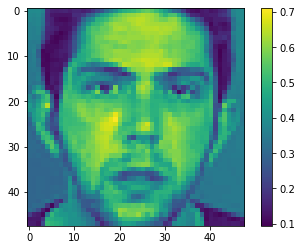

In [8]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
predictions = model.predict(x_test.reshape(7178,48,48))

225/225 [==============================] - 1s 3ms/step


In [24]:
np.argmax(predictions[1234])

2

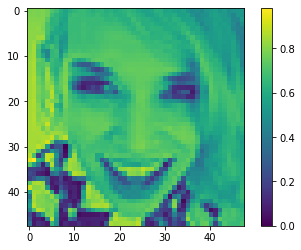

In [25]:
plt.figure()
plt.imshow(x_test.reshape(7178,48,48)[1234])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']